In [43]:
from __future__ import print_function  # Python 2 and 3
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import linear_model
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')


import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)

In [5]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [7]:
train = pd.read_csv('//Users/rociobecerra/Desktop/Project-Tribore/RocioBecerra/train.csv')
train = train.sort_index(axis=1)
train.head()

In [8]:
train['MSSubClass'] = train['MSSubClass'].astype(str) #MSSubClass: The building class CONVERT to String 
train['MoSold'] = train['MoSold'].astype(str) #MoSold: Month Sold

In [21]:
#missing NAN values for each column 
#MISSING Nans in data
null_columns=train.columns[train.isnull().any()]
train[null_columns].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

# LotFrontage : 259 missing values - need to be imputed through potentially lot size/ square footage

# MasVnrType: 8 - can possibly put None or can try to impute from other factors

# MasVnrArea: 8 - related to MasVnrType but can potentially impute based on the decision we make

# Electrical: 1 missing values - missing totally at random. should be able to impute

In [11]:
train.describe()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Numerical Correlation Plot 

In [13]:
#Numerical Correlation Plot 
corr = train.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1,-0.011,-0.033,-0.028,0.013,-0.013,-0.022,-0.05,-0.005,-0.006,-0.0079,-0.015,0.01,0.0056,-0.044,0.0083,0.0023,-0.02,0.0056,0.0068,0.038,0.003,0.027,-0.02,7.2e-05,0.017,0.018,-0.03,-0.00048,0.0029,-0.047,0.0013,0.057,-0.0062,0.021,0.00071,-0.022
LotFrontage,-0.011,1,0.43,0.25,-0.059,0.12,0.089,0.19,0.23,0.05,0.13,0.39,0.46,0.08,0.038,0.4,0.1,-0.0072,0.2,0.054,0.26,-0.0061,0.35,0.27,0.07,0.29,0.34,0.089,0.15,0.011,0.07,0.041,0.21,0.0034,0.011,0.0074,0.35
LotArea,-0.033,0.43,1,0.11,-0.0056,0.014,0.014,0.1,0.21,0.11,-0.0026,0.26,0.3,0.051,0.0048,0.26,0.16,0.048,0.13,0.014,0.12,-0.018,0.19,0.27,-0.025,0.15,0.18,0.17,0.085,-0.018,0.02,0.043,0.078,0.038,0.0012,-0.014,0.26


# MULTICOLLINEARITY 

In [25]:
#MULTICOLLINEARITY 
#Multicollinearity increases the standard errors of the coefficients.
    # Completely remove those variables
    # Make new feature by adding them or by some other operation.
    # Use PCA, which will reduce feature set to small number of non-collinear features.
train_3 = train.copy()

drop_saleprice = train_3.drop('SalePrice', 1) #drop saleprice 
correlations= drop_saleprice.corr()

threshold = 0.5
important_corrs = (correlations[abs(correlations) > threshold][correlations != 1.0]) \
    .unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), 
        columns=['Attribute Pair', 'Correlation'])

    # sorted by absolute value
unique_important_corrs = unique_important_corrs.ix[
    abs(unique_important_corrs['Correlation']).argsort()[::-1]]

unique_important_corrs

/Users/rociobecerra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


,Attribute Pair,Correlation
3,"(GarageArea, GarageCars)",0.882475
16,"(GrLivArea, TotRmsAbvGrd)",0.825489
11,"(1stFlrSF, TotalBsmtSF)",0.819530
10,"(2ndFlrSF, GrLivArea)",0.687501
8,"(BedroomAbvGr, TotRmsAbvGrd)",0.676620
0,"(BsmtFinSF1, BsmtFullBath)",0.649212
22,"(FullBath, GrLivArea)",0.630012
21,"(2ndFlrSF, TotRmsAbvGrd)",0.616423
7,"(2ndFlrSF, HalfBath)",0.609707
5,"(GarageCars, OverallQual)",0.600671


# Correlation Between SalePrice and all other predictors 

In [15]:
#correlation Between SalePrice and all other predictors 
train[train.columns].corr()['SalePrice'][:].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

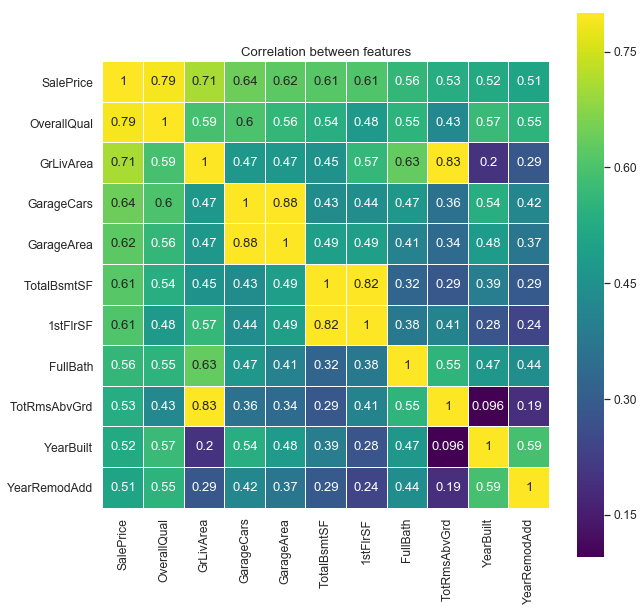

In [26]:
corrMatrix=train[["SalePrice","OverallQual","GrLivArea","GarageCars",
                  "GarageArea","GarageYrBlt","TotalBsmtSF","1stFlrSF","FullBath",
                  "TotRmsAbvGrd","YearBuilt","YearRemodAdd"]].corr()

sns.set(font_scale=1.10)
plt.figure(figsize=(10, 10))

sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features');

# FOCUS ON YELLOW CORRELATIONS 

# SalePrice and OverallQual (STRONG CORRELATION BETWEEN TARGET AND PREDICTOR)

# GarageArea and GarageCars

# TotalBsmtSF and 1stFlrSF

# GrLiveArea and TotRmsAbvGrd

# YearBulit and GarageYrBlt

# Create a single feature from them before we use them as predictors.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ee0ea20>,
      dtype=object)

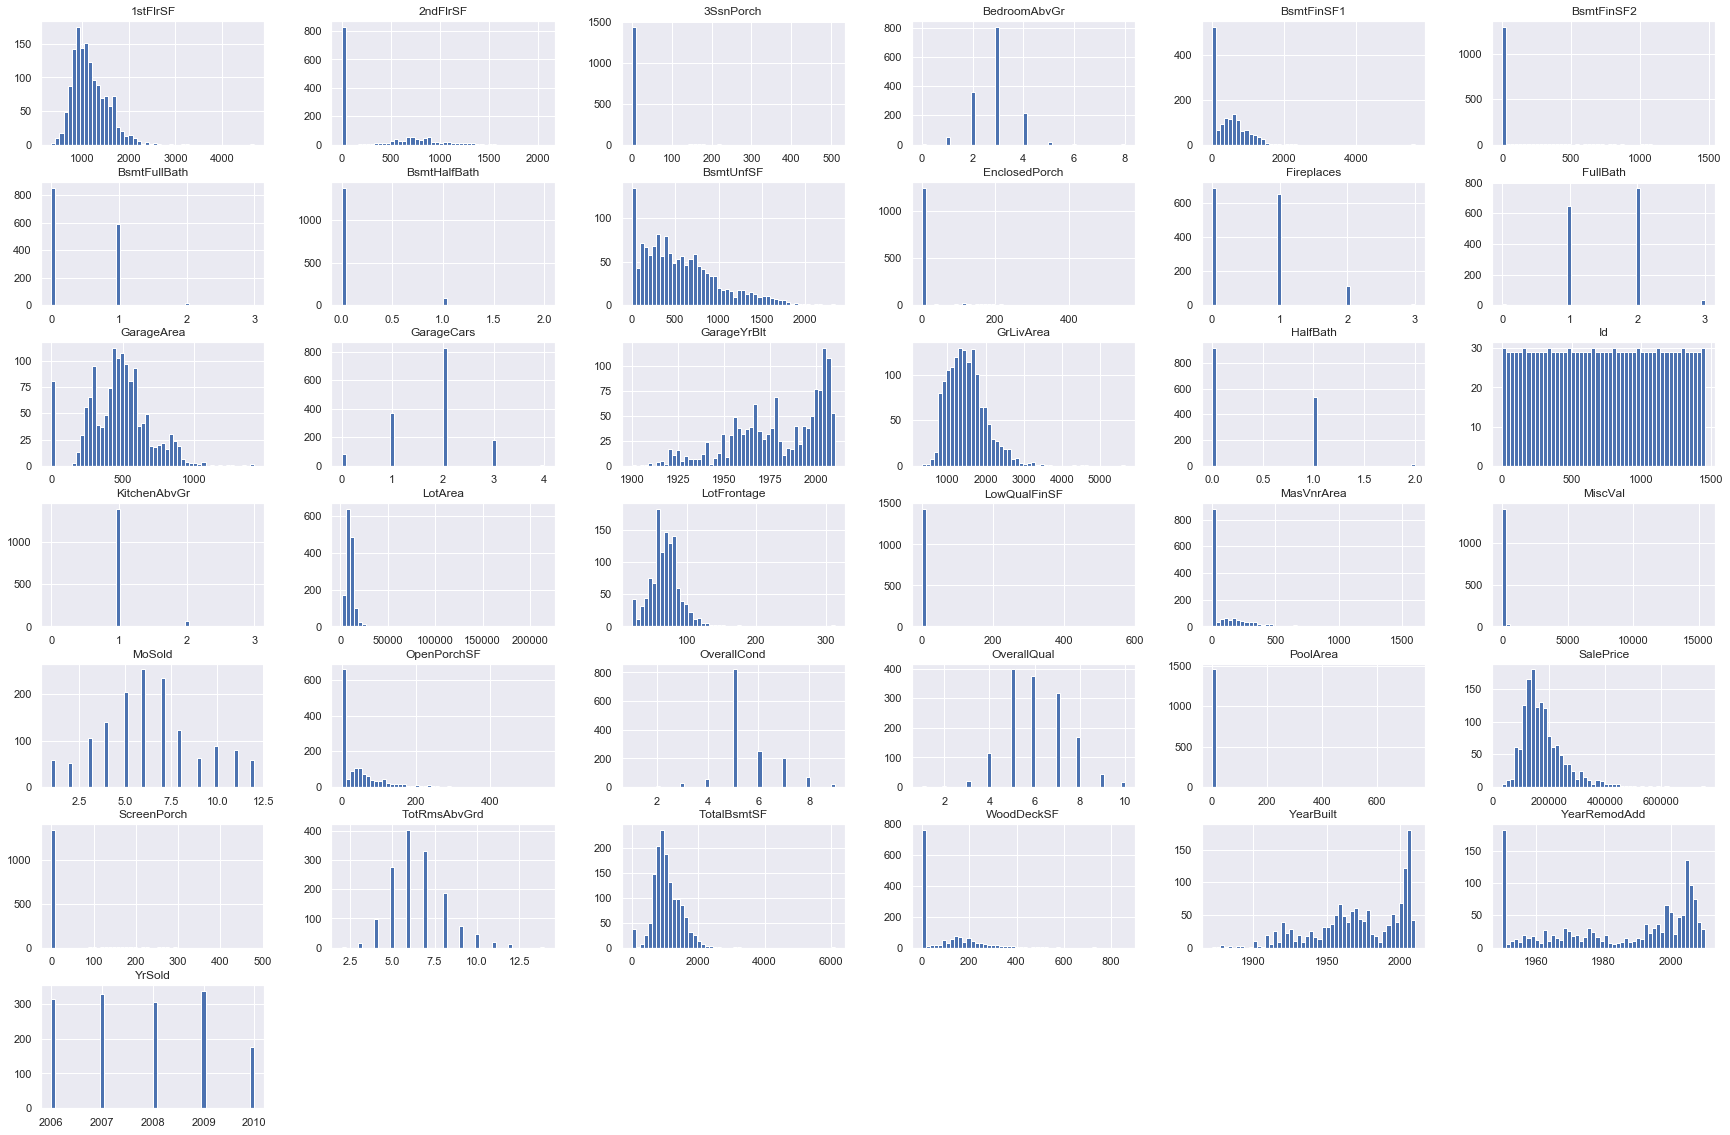

In [16]:
train.hist(bins=50, figsize=(30,20))

# VALUE COUNTS for Categorical Features

In [17]:
categorical = ['Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1', \
               'BsmtFinType2','FireplaceQu','GarageType','GarageYrBlt','GarageFinish', \
               'GarageQual','GarageCond','PoolQC','Fence','MiscFeature']
c_list = sorted(categorical)
for feature in c_list:
    print(train[feature].value_counts())
    print('')

Grvl    50
Pave    41
Name: Alley, dtype: int64

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

20

# IMPUTATIONS

Text(0.5, 0, 'Electrical')

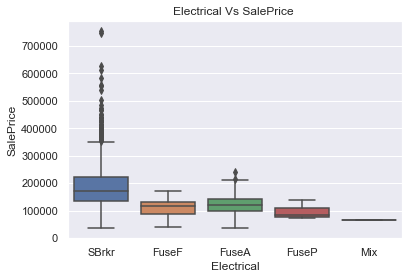

In [18]:
#Electrical Missing value 
sns.boxplot("Electrical","SalePrice",data=train)
plt.title("Electrical Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Electrical")

In [19]:
#We can replace missing values with most frequent ones.
train["Electrical"] = train["Electrical"].fillna('SBrkr')

In [20]:
#MISSING Nans in data
null_columns=train.columns[train.isnull().any()]
train[null_columns].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [22]:
#Replace categorical missing values with 'None'

categorical = ['Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1', \
               'BsmtFinType2','FireplaceQu','GarageType','GarageYrBlt','GarageFinish', \
               'GarageQual','GarageCond','PoolQC','Fence','MiscFeature']

c_list = sorted(categorical)

for feature in c_list:
    train[feature]=train[feature].replace(np.nan, 'None')

In [24]:
#check if there is any missing values 
# NEED to still impute LotFrontage, MasVnrAreaz
check_columns=train.columns[train.isnull().any()]
train[check_columns].isnull().sum()

LotFrontage    259
MasVnrArea       8
dtype: int64

In [90]:
#Replaced Nans in MasVnrArea with '0'
train['MasVnrArea'] = train['MasVnrArea'].replace(np.nan, 0)

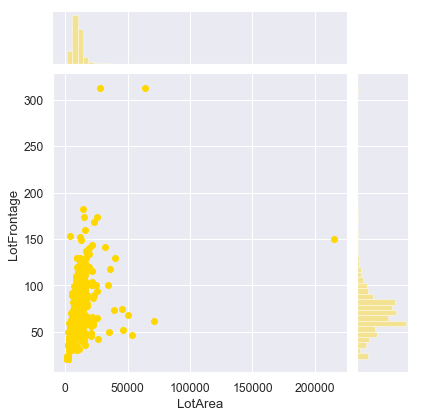

In [40]:
#From other studies they suggested using LotArea to predict LotFrontage, because of their linear relationship
sns.jointplot(train['LotArea'],train['LotFrontage'],color='gold')

In [44]:
#Borrowed this fuction Code from a previous study 
def fill_mv_LotFrontage(df,r0):
    '''
    Fills in missing lot frontage values using regression where it makes sense
    and median value otherwise
    '''
    ols = linear_model.LinearRegression()
    nhoods = df.Neighborhood.unique()

    for nhood in nhoods:
        df_n = df[ df['Neighborhood'] == nhood ]
        mv_idx = (df['Neighborhood'] == nhood) & (df['LotFrontage'].isnull())
        
        # if there are mv in this neighborhood
        if np.sum(mv_idx) > 0:
            X = np.array(df_n.loc[ df_n['LotFrontage'].notnull(),['LotArea']]).reshape(-1,1)
            Y = np.array(df_n.loc[ df_n['LotFrontage'].notnull(), ['LotFrontage']])
            ols.fit(X,Y)
            R2 = ols.score(X,Y)
            print(nhood, "R^2: %.2f" %R2, "beta_1: %.3f" %ols.coef_, "beta_0: %.3f" %ols.intercept_)
        
            # if neighborhood based regression on LotArea has decent R^2
            if R2 > r0:
                df.loc[ mv_idx , ['LotFrontage'] ] = ols.predict( np.array(df.loc[mv_idx, 'LotArea' ]).reshape(-1,1) )
                print("imputed with regression \n", df.loc[ mv_idx , ['LotFrontage'] ],"\n" )
            else:
                df.loc[ mv_idx , ['LotFrontage'] ] = np.median(X)
                print("imputed with neighborhood median \n",  df.loc[ mv_idx , ['LotFrontage'] ],"\n" )
    return df

In [45]:
train = fill_mv_LotFrontage(train, 0.5)

CollgCr R^2: 0.12 beta_1: 0.003 beta_0: 45.285
imputed with neighborhood median 
       LotFrontage
43         9359.5
64         9359.5
203        9359.5
214        9359.5
518        9359.5
539        9359.5
593        9359.5
610        9359.5
612        9359.5
690        9359.5
721        9359.5
811        9359.5
856        9359.5
879        9359.5
911        9359.5
928        9359.5
983        9359.5
1033       9359.5
1037       9359.5
1318       9359.5
1342       9359.5
1354       9359.5
1368       9359.5
1441       9359.5 

Veenker R^2: 0.01 beta_1: 0.000 beta_0: 56.990
imputed with neighborhood median 
       LotFrontage
160       10768.0
672       10768.0
1164      10768.0
1253      10768.0 

Crawfor R^2: 0.40 beta_1: 0.003 beta_0: 40.054
imputed with neighborhood median 
       LotFrontage
113       10594.0
218       10594.0
529       10594.0
726       10594.0
1059      10594.0
1161      10594.0
1244      10594.0
1268      10594.0
1301      10594.0
1419      10594.0 

NoRidge R^

# TARGET VARIABLE

Text(0.5, 0, 'Sale Price')

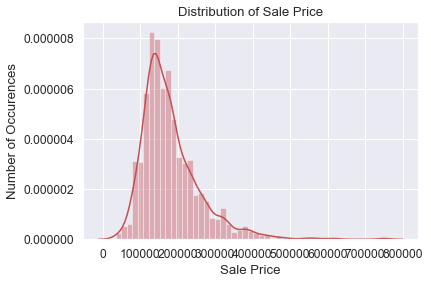

In [28]:
#TARGET VARIABLE
sns.distplot(train['SalePrice'], color="r", kde=True)
plt.title("Distribution of Sale Price")
plt.ylabel("Number of Occurences")
plt.xlabel("Sale Price")

In [30]:
#skewness and kurtosis
#Skewness is usually described as a measure of a dataset’s symmetry,The normal distribution has a skewness of 0. 
#“The kurtosis parameter is a measure of the combined weight of the tails relative to the rest of the distribution.”
#kurtosis: It measures the tail-heaviness of the distribution. the kurtosis for a normal distribution is 0.
#kurtosis looks at the combined size of the tails. 
#kurtosis: f a dataset has a positive kurtosis, it has more in the tails than the normal distribution.  
#If a dataset has a negative kurtosis, it has less in the tails than the normal distribution. 
#The kurtosis decreases as the tails become lighter.  It increases as the tails become heavier. 
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [ ]:
#OUTLIERS IN SALEPRICE 

Text(0, 0.5, 'Sale Price')

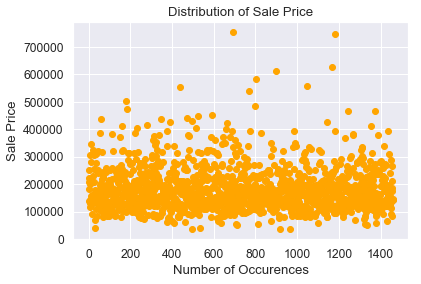

In [37]:
plt.scatter(range(train.shape[0]), train["SalePrice"].values,color='orange')
plt.title("Distribution of Sale Price")
plt.xlabel("Number of Occurences")
plt.ylabel("Sale Price")

In [31]:
train['LogSalePrice'] = np.log(train['SalePrice'])

Text(0.5, 0, 'Log(Sale) Price')

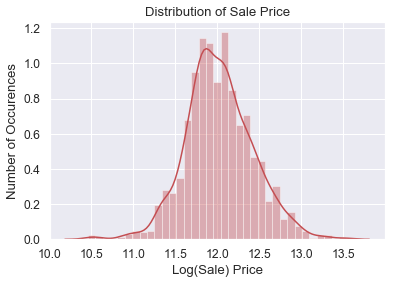

In [32]:
sns.distplot(train['LogSalePrice'], color="r", kde=True)
plt.title("Distribution of Sale Price")
plt.ylabel("Number of Occurences")
plt.xlabel("Log(Sale) Price")

In [33]:
print("Skewness: %f" % train['LogSalePrice'].skew())
print("Kurtosis: %f" % train['LogSalePrice'].kurt())

Skewness: 0.121335
Kurtosis: 0.809532


# Plot between highly correlated numerical variables and LogSalePrice

In [38]:
# Plot between highly correlated numerical variables and LogSalePrice
corr=train.corr()["LogSalePrice"]
corr[np.argsort(corr, axis=0)[::-1]]

LogSalePrice     1.000000
SalePrice        0.948374
OverallQual      0.817184
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
TotRmsAbvGrd     0.534422
Fireplaces       0.489449
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355878
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209044
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057329
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: LogSalePrice, dtype: float64

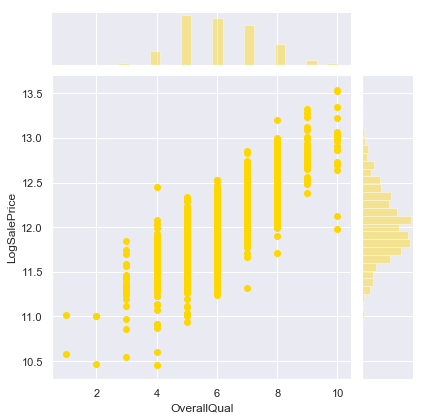

In [47]:
#OverallQual
sns.jointplot(train['OverallQual'],train['LogSalePrice'],color='gold')

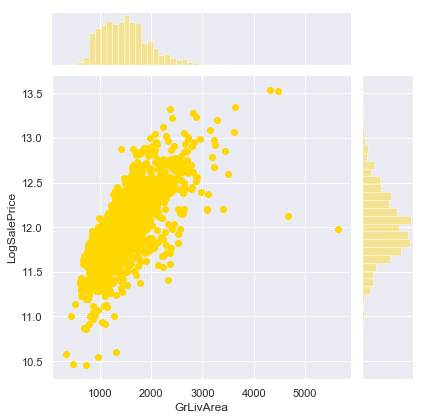

In [49]:
#GrLivArea
#couple outliers
sns.jointplot(train['GrLivArea'],train['LogSalePrice'],color='gold')

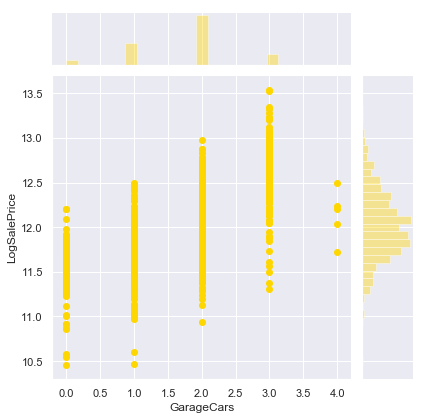

In [50]:
#GarageCars
sns.jointplot(train['GarageCars'],train['LogSalePrice'],color='gold')

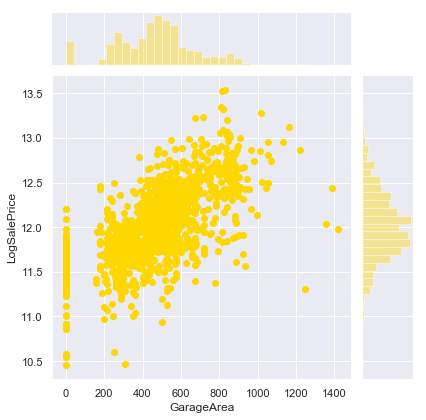

In [52]:
#GarageArea
#some outliers 
sns.jointplot(train['GarageArea'],train['LogSalePrice'],color='gold')

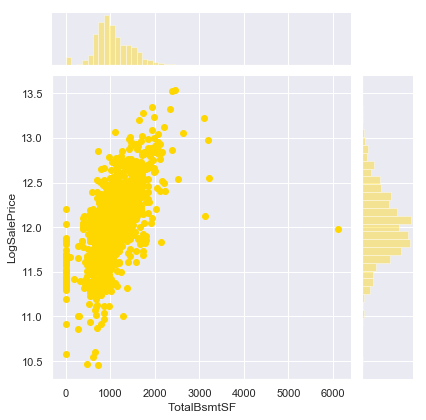

In [54]:
#TotalBsmtSF
#some outlier
sns.jointplot(train['TotalBsmtSF'],train['LogSalePrice'],color='gold')

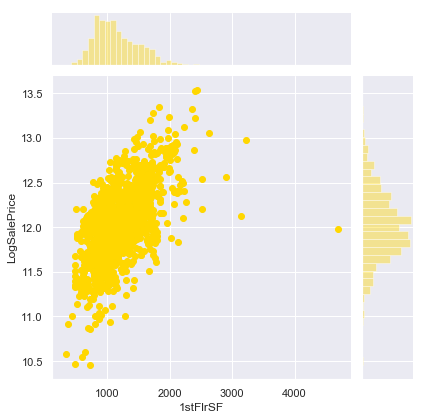

In [56]:
#1stFlrSF 
sns.jointplot(train['1stFlrSF'],train['LogSalePrice'],color='gold')

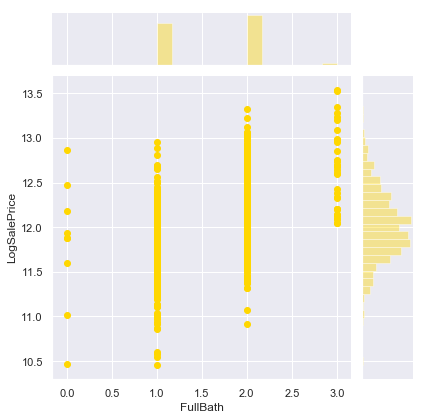

In [57]:
#FullBath
sns.jointplot(train['FullBath'],train['LogSalePrice'],color='gold')

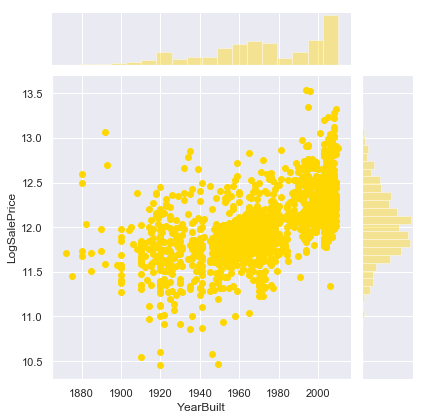

In [59]:
#YearBuilt
sns.jointplot(train['YearBuilt'],train['LogSalePrice'],color='gold')

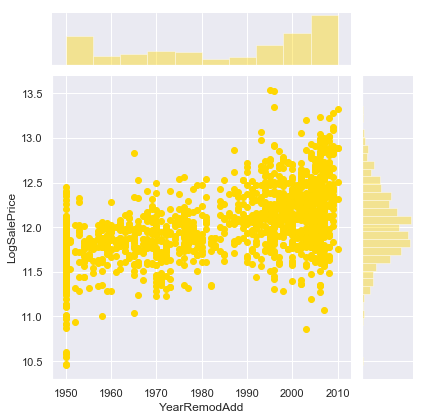

In [61]:
#YearRemodAdd     
sns.jointplot(train['YearRemodAdd'],train['LogSalePrice'],color='gold')

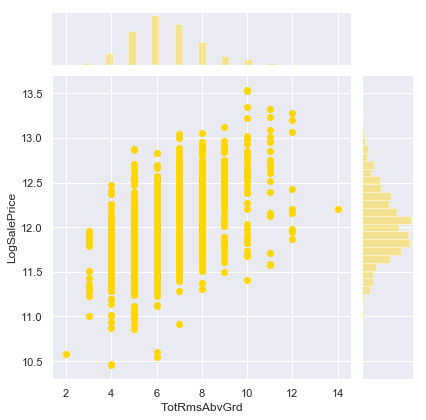

In [63]:
#TotRmsAbvGrd
sns.jointplot(train['TotRmsAbvGrd'],train['LogSalePrice'],color='gold')

# Experimenting with MCA for feature reduction in categoricals 

In [65]:
import prince 

In [68]:
#list of names of categorical features
categorical = train.select_dtypes(include=[object])
categorical

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,2003,RFn,TA,TA,Y,None,None,None,WD,Normal
1,20,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,1976,RFn,TA,TA,Y,None,None,None,WD,Normal
2,60,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,2001,RFn,TA,TA,Y,None,None,None,WD,Normal
3,70,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,1998,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,60,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,2000,RFn,TA,TA,Y,None,None,None,WD,Normal
5,50,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,Wood,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,None,Attchd,1993,Unf,TA,TA,Y,None,MnPrv,Shed,WD,Normal
6,20,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Ex,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,2004,RFn,TA,TA,Y,None,None,None,WD,Normal
7,60,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,Gable,CompShg,HdBoard,HdBoard,Stone,TA,TA,CBlock,Gd,TA,Mn,ALQ,BLQ,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,1973,RFn,TA,TA,Y,None,None,Shed,WD,Normal
8,50,RM,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,Gable,CompShg,BrkFace,Wd Shng,None,TA,TA,BrkTil,TA,TA,No,Unf,Unf,GasA,Gd,Y,FuseF,TA,Min1,TA,Detchd,1931,Unf,Fa,TA,Y,None,None,None,WD,Abnorml
9,190,RL,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,BrkTil,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,1939,RFn,Gd,TA,Y,None,None,None,WD,Normal


In [69]:
 mca = prince.MCA(
    n_components=2,
    n_iter=3,
     copy=True,
    check_input=True,
     engine='auto',
    random_state=42 )

In [70]:
df_processed = pd.get_dummies(categorical, prefix_sep="__", drop_first=True)

In [71]:
mca = mca.fit(df_processed)

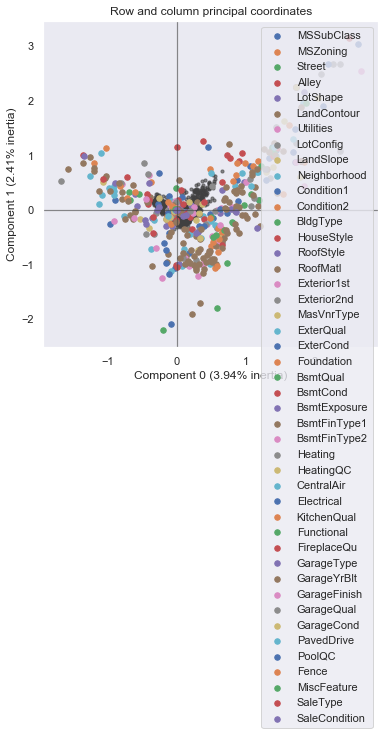

In [72]:
ax = mca.plot_coordinates(
X=df_processed,
ax=None,
figsize=(6, 6),
show_row_points=True,
row_points_size=10,
show_row_labels=False,
show_column_points=True,
column_points_size=30,
show_column_labels=False,
legend_n_cols=1)

In [74]:
#Factorized the Categorical Variables and than ran a correlation 
cat = train.select_dtypes(exclude=['int64', 'float64'])
matrix_cat = cat.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
matrix_cat

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
MSSubClass,1.000000,0.237224,0.021454,0.175813,-0.185521,-0.016750,-0.015507,-0.073408,-0.000667,0.186923,-0.058862,0.045502,0.607619,0.517873,-0.070763,0.009000,0.164414,0.176058,-0.016736,0.094959,0.056426,0.157938,0.010117,0.031862,0.062907,0.005443,0.004828,0.053793,0.155946,0.126947,0.079344,0.088048,0.037394,-0.121777,0.231205,0.073579,0.070837,0.173307,0.161933,0.077825,0.032382,0.029061,0.013712,-0.004995,-0.025776
MSZoning,0.237224,1.000000,0.039678,0.399270,-0.167918,-0.013396,-0.011167,-0.094747,-0.043444,-0.067889,-0.026021,0.016014,0.271750,-0.047199,-0.088537,-0.049864,-0.063732,-0.025637,0.069241,-0.018093,0.017808,0.011181,-0.013397,0.048384,-0.076712,0.005577,-0.089060,0.012889,-0.035643,0.144970,0.084804,-0.030523,-0.029668,-0.145522,0.118721,-0.003246,0.039377,0.077892,0.063774,0.117402,-0.027587,-0.074069,-0.029479,0.058948,0.068705
Street,0.021454,0.039678,1.000000,-0.015611,0.010129,0.097236,-0.001682,0.004458,0.179360,0.053445,0.023914,-0.005881,0.023392,0.025328,0.006881,-0.007749,0.011874,0.015314,-0.013980,0.143047,0.002633,0.021128,-0.008425,-0.019427,0.035998,0.018552,0.033588,-0.008194,0.043211,0.069869,0.021466,0.055746,-0.015465,-0.025771,0.132576,0.035974,0.007698,0.021837,0.016033,0.011248,-0.004154,-0.026964,0.119346,0.021171,0.022919
Alley,0.175813,0.399270,-0.015611,1.000000,-0.078708,0.009274,-0.006362,-0.063340,-0.021518,-0.063131,-0.013151,-0.022250,0.136777,-0.014009,-0.016105,-0.029315,-0.017522,0.010896,0.043793,-0.003564,0.026695,0.086580,0.026652,0.061990,-0.106192,0.062497,-0.075240,0.089305,-0.018874,0.144894,0.074266,-0.013329,0.031371,-0.083976,0.078323,0.071629,-0.004934,0.056438,0.063642,0.153503,-0.015717,-0.002182,-0.012697,-0.000025,0.026551
LotShape,-0.185521,-0.167918,0.010129,-0.078708,1.000000,0.201047,0.026616,0.308073,0.144248,-0.013295,0.066612,0.052183,-0.134373,-0.067647,0.043063,0.118271,-0.030630,-0.068168,0.034001,-0.111502,-0.047015,-0.158779,-0.128492,-0.057330,0.065124,-0.097725,0.032886,-0.043320,-0.119556,-0.099138,-0.086719,-0.089061,-0.017841,0.138874,-0.098675,-0.094074,0.012848,-0.094660,-0.101061,-0.100666,0.065749,-0.056967,0.015706,0.001435,-0.004773
LandContour,-0.016750,-0.013396,0.097236,0.009274,0.201047,1.000000,-0.007963,0.021107,0.507203,0.113336,-0.021478,0.012096,-0.042667,-0.004987,0.100625,0.109717,0.034502,0.014566,0.086651,0.075493,0.001553,-0.000145,0.013419,0.006604,0.066580,0.011427,-0.025770,-0.024849,0.028243,0.023605,0.021122,0.037246,0.016088,0.057767,0.046740,0.033310,0.059278,0.006150,0.001482,0.081031,0.000483,-0.080568,-0.005633,-0.014537,0.062826
Utilities,-0.015507,-0.011167,-0.001682,-0.006362,0.026616,-0.007963,1.000000,0.062298,-0.005909,0.029258,-0.008311,-0.002397,-0.010899,0.076219,-0.011462,-0.003158,0.008321,0.004602,-0.033471,0.012733,-0.008842,0.008611,0.006474,-0.007918,-0.017046,-0.028888,0.069902,-0.003339,0.003963,-0.006907,0.091048,-0.026715,-0.006303,0.025550,0.094448,-0.015572,-0.032176,-0.008019,-0.007620,-0.007368,-0.001693,-0.010989,-0.004594,0.057455,0.019173
LotConfig,-0.073408,-0.094747,0.004458,-0.063340,0.308073,0.021107,0.062298,1.000000,0.033673,-0.055593,0.061695,0.018440,-0.106812,0.005696,0.067337,0.112297,0.022409,0.015406,-0.004082,-0.037293,0.008542,0.000844,0.005167,0.017802,0.051940,-0.005160,0.017362,0.004421,-0.018754,-0.026600,-0.038397,-0.046671,0.008194,0.033548,-0.039071,-0.019900,-0.000694,-0.041558,-0.010232,-0.065917,0.042907,0.026564,0.001147,0.012120,-0.013638
LandSlope,-0.000667,-0.043444,0.179360,-0.021518,0.14424

# ANOVA (need to figure out a proper loop output)

In [76]:
#ANOVA 

#DROP:Alley,BldgType,BsmtCond, Street, Utilities, Condition1,Condition2,Electrical,ExterCond,Exterior1st,Exterior2nd,
#Fence,Functional,GarageCond,GarageQual,Heating,HouseStyle,LandContour,LandSlope,LotConfig,LotShape,MSSubClass,MSZoning
#MiscFeature,MoSold,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType

#KEEP: BsmtExposure, BsmtFinType1,CentralAir,GarageType,HeatingQC
#BsmtQual,ExterQual,FireplaceQu,Foundation,GarageFinish,KitchenQual,MasVnrType,Neighborhood

import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('SalePrice ~ Fence',
                data=train).fit()                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq      df          F        PR(>F)
Fence     3.279372e+11     4.0  13.433276  9.379977e-11
Residual  8.879974e+12  1455.0        NaN           NaN


In [77]:
cat_2 = cat[["BsmtExposure", "BsmtFinType1","CentralAir","GarageType","HeatingQC","BsmtQual","ExterQual","FireplaceQu","Foundation","GarageFinish","KitchenQual","MasVnrType","Neighborhood"]]

In [78]:
#MultiCollinearity for Kept Categorical Features 
matrix_cat2 = cat_2.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1).abs()
s = matrix_cat2.unstack()
so = s.sort_values(kind="quicksort")
so

FireplaceQu   KitchenQual     0.000632
KitchenQual   FireplaceQu     0.000632
FireplaceQu   GarageFinish    0.003488
GarageFinish  FireplaceQu     0.003488
MasVnrType    FireplaceQu     0.003918
FireplaceQu   MasVnrType      0.003918
BsmtFinType1  GarageFinish    0.005133
GarageFinish  BsmtFinType1    0.005133
GarageType    BsmtExposure    0.008591
BsmtExposure  GarageType      0.008591
              GarageFinish    0.009487
GarageFinish  BsmtExposure    0.009487
BsmtQual      FireplaceQu     0.014964
FireplaceQu   BsmtQual        0.014964
MasVnrType    HeatingQC       0.018947
HeatingQC     MasVnrType      0.018947
GarageFinish  HeatingQC       0.020111
HeatingQC     GarageFinish    0.020111
KitchenQual   BsmtExposure    0.021219
BsmtExposure  KitchenQual     0.021219
Foundation    GarageFinish    0.024916
GarageFinish  Foundation      0.024916
MasVnrType    Neighborhood    0.025252
Neighborhood  MasVnrType      0.025252
BsmtExposure  CentralAir      0.025601
CentralAir    BsmtExposur

# Feature Engineering 

In [80]:
train['Age'] = train['YrSold'] - train['YearBuilt']
train['Re_Age'] = train['YrSold'] - train['YearRemodAdd']

In [81]:
train = train.drop(['YrSold', 'YearBuilt','YearRemodAdd'], axis = 1) 

In [82]:
#NEW Correlation between SalePrice and Features with new features 
corre = train[train.columns].corr()['SalePrice'][:].sort_values(ascending=False)
corre

SalePrice        1.000000
LogSalePrice     0.948374
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
LotFrontage      0.082688
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
OverallCond     -0.077856
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Re_Age          -0.509079
Age             -0.523350
Name: SalePrice, dtype: float64

In [83]:
#Correlation between LogSalePrice and Features with newly created features
train[train.columns].corr()['LogSalePrice'][:].sort_values(ascending=False)

LogSalePrice     1.000000
SalePrice        0.948374
OverallQual      0.817184
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
TotRmsAbvGrd     0.534422
Fireplaces       0.489449
MasVnrArea       0.430809
BsmtFinSF1       0.372023
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209044
LotFrontage      0.126666
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057329
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
LowQualFinSF    -0.037963
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Re_Age          -0.568136
Age             -0.587290
Name: LogSalePrice, dtype: float64

In [ ]:
#dropped R_Age

# FINAL SELECTED FEATURES

In [93]:
final = train[["1stFlrSF","LogSalePrice",'BsmtExposure','BsmtFinType1','CentralAir','GarageType','HeatingQC','BsmtQual',
'ExterQual','FireplaceQu','Foundation','GarageFinish','KitchenQual','MasVnrType',
 'Neighborhood',"OverallQual","GrLivArea","GarageCars","FullBath","MasVnrArea",
 "Fireplaces","BsmtFinSF1","LotFrontage","WoodDeckSF","OpenPorchSF",'Age',"LotArea","HalfBath"]]

In [94]:
final_1 = pd.get_dummies(final, drop_first=True)
housefeatures = final_1.loc[:, final_1.columns != 'LogSalePrice' ]
price = final_1['LogSalePrice']

In [95]:
import statsmodels.api as sm 
X_add_const = sm.add_constant(housefeatures)
ols = sm.OLS(price, X_add_const)
ans = ols.fit()
print(ans.summary())

                            OLS Regression Results                            
Dep. Variable:           LogSalePrice   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     126.7
Date:                Tue, 27 Aug 2019   Prob (F-statistic):               0.00
Time:                        02:24:46   Log-Likelihood:                 843.03
No. Observations:                1460   AIC:                            -1518.
Df Residuals:                    1376   BIC:                            -1074.
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   10.9236 

In [99]:
model_pvalues = pd.DataFrame(ans.pvalues, columns=['pvalues'])
model_pvalues

,pvalues
const,0.000000e+00
1stFlrSF,1.495937e-04
OverallQual,5.970659e-31
GrLivArea,1.487210e-20
GarageCars,1.309531e-13
FullBath,1.700372e-04
MasVnrArea,3.143003e-01
Fireplaces,7.784382e-01
BsmtFinSF1,3.597498e-01
LotFrontage,5.738458e-01


# Significant p-values for reduced feature selection model 

In [100]:
model_pvalues[model_pvalues['pvalues'] <= 0.5]

,pvalues
const,0.000000e+00
1stFlrSF,1.495937e-04
OverallQual,5.970659e-31
GrLivArea,1.487210e-20
GarageCars,1.309531e-13
FullBath,1.700372e-04
MasVnrArea,3.143003e-01
BsmtFinSF1,3.597498e-01
WoodDeckSF,3.612688e-04
OpenPorchSF,2.089185e-01
